2.1269376277923584


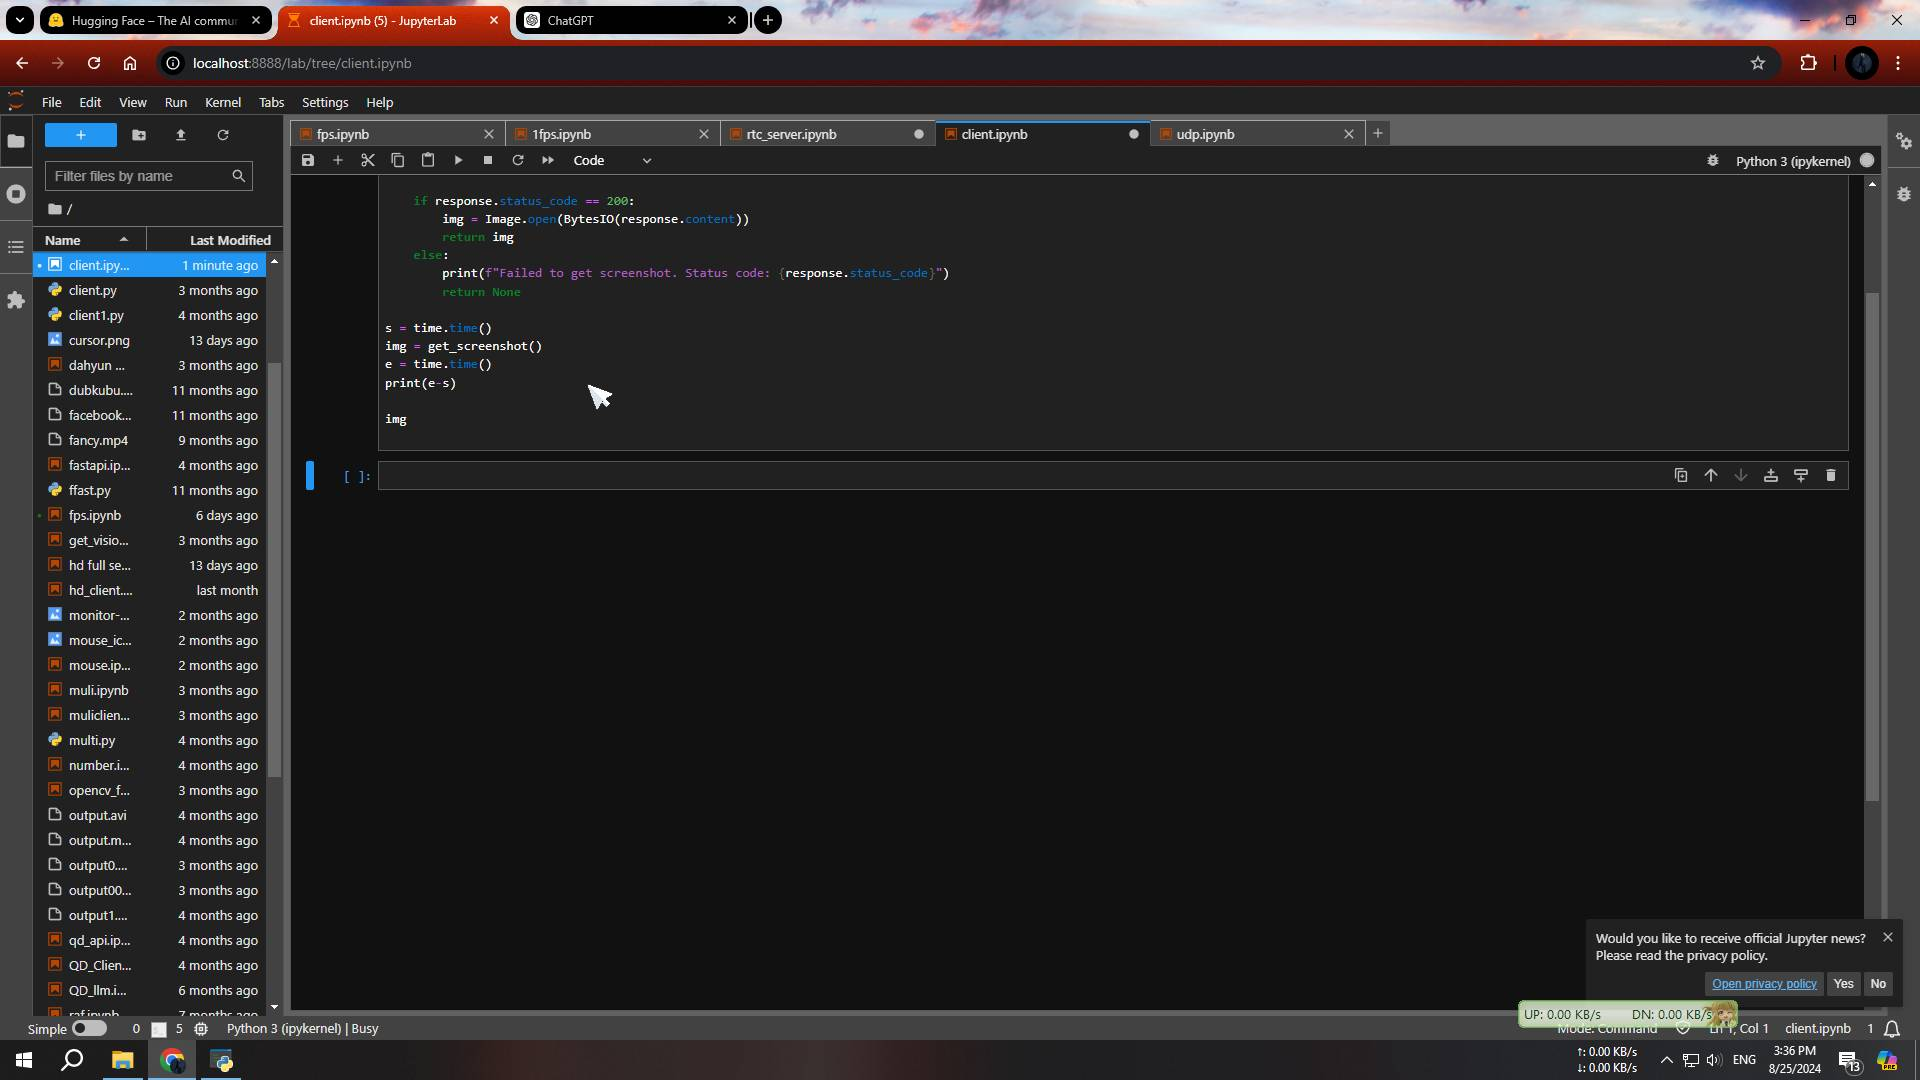

In [9]:
import requests
from PIL import Image
from io import BytesIO
import time

def get_screenshot():
    url = "http://localhost:3000/screenshot"
    response = requests.get(url)
    
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        return img
    else:
        print(f"Failed to get screenshot. Status code: {response.status_code}")
        return None

s = time.time()
img = get_screenshot()
e = time.time()
print(e-s)

img


0.328704833984375


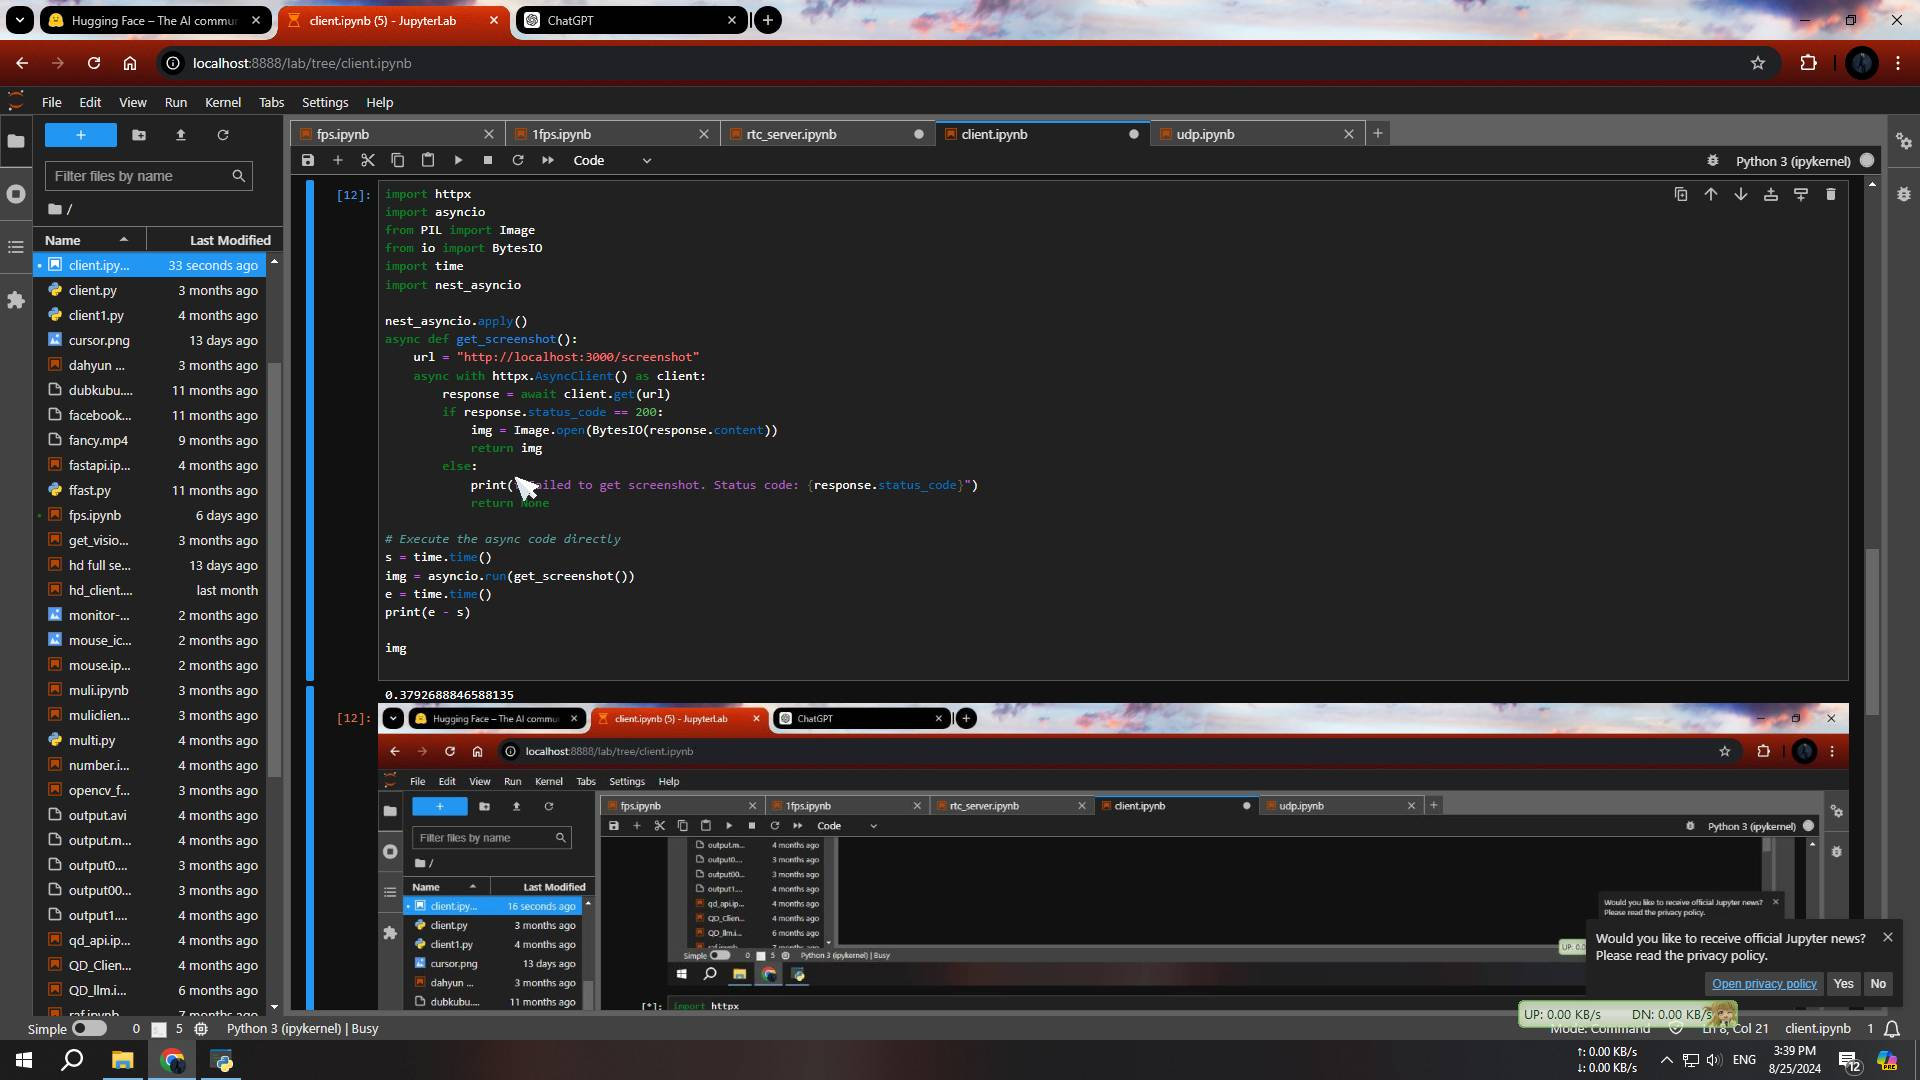

In [13]:
import aiohttp
import asyncio
from PIL import Image
from io import BytesIO
import time

async def get_screenshot():
    url = "http://localhost:3000/screenshot"
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                img_data = await response.read()
                img = Image.open(BytesIO(img_data))
                return img
            else:
                print(f"Failed to get screenshot. Status code: {response.status}")
                return None


s = time.time()
img = await get_screenshot()
e = time.time()
print(e - s)

img


0.35492491722106934


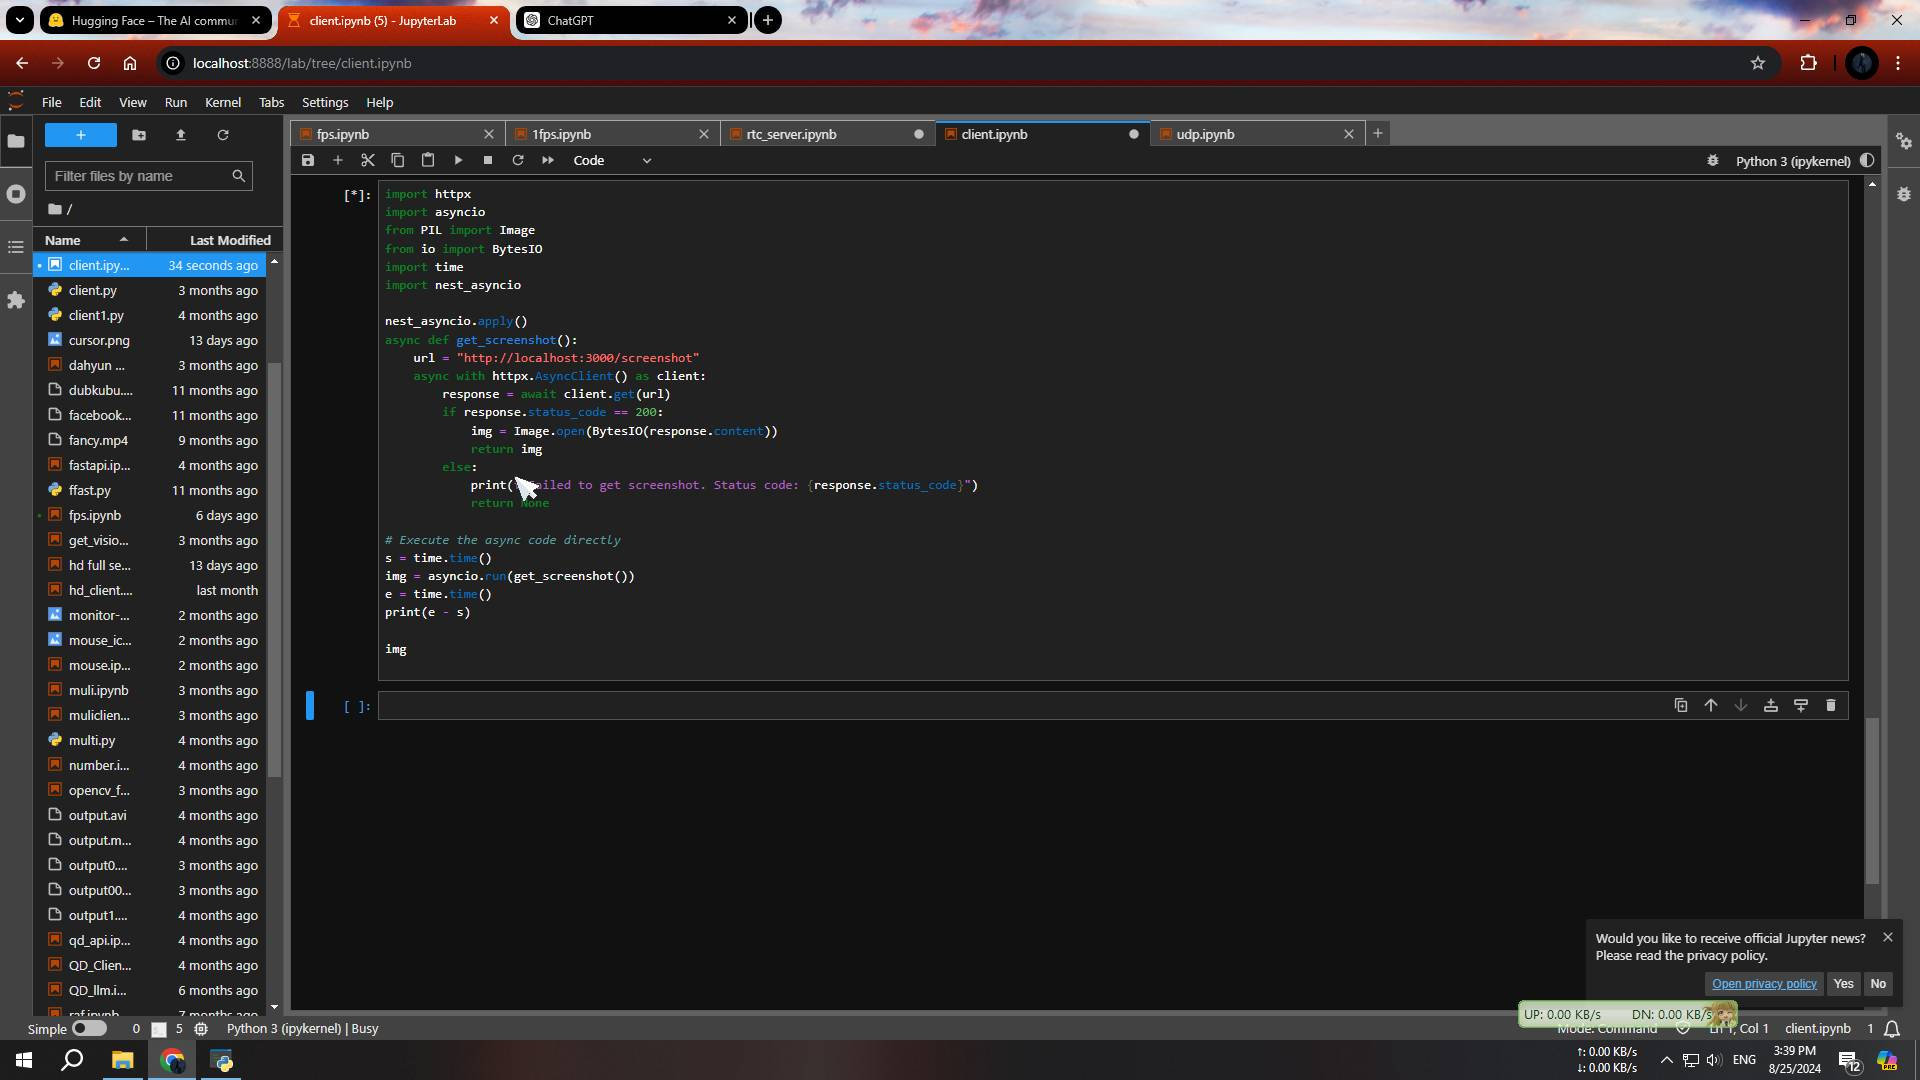

In [14]:
import httpx
import asyncio
from PIL import Image
from io import BytesIO
import time
import nest_asyncio

nest_asyncio.apply()
async def get_screenshot():
    url = "http://localhost:3000/screenshot"
    async with httpx.AsyncClient() as client:
        response = await client.get(url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            return img
        else:
            print(f"Failed to get screenshot. Status code: {response.status_code}")
            return None

# Execute the async code directly
s = time.time()
img = asyncio.run(get_screenshot())
e = time.time()
print(e - s)

img


In [ ]:
# AWS Ubuntu RDP (client) script

import socket
import cv2
import numpy as np

# Client configuration
NGROK_URL = "0.tcp.ngrok.io:13576"  # Use the full ngrok URL including port
SERVER_HOST, SERVER_PORT = NGROK_URL.split(':')
SERVER_PORT = int(SERVER_PORT)  # Convert port to integer
BUFFER_SIZE = 4096

# Create TCP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((SERVER_HOST, SERVER_PORT))

print(f"Connected to {SERVER_HOST}:{SERVER_PORT}")

def receive_frame():
    # Receive frame size
    size_data = sock.recv(4)
    frame_size = int.from_bytes(size_data, byteorder='big')
    
    # Receive frame data
    frame_data = b''
    while len(frame_data) < frame_size:
        chunk = sock.recv(min(BUFFER_SIZE, frame_size - len(frame_data)))
        if not chunk:
            raise RuntimeError("Socket connection broken")
        frame_data += chunk
    return frame_data

try:
    while True:
        # Request a new frame
        sock.send(b'REQUEST_FRAME')
        
        # Receive and display the frame
        frame_data = receive_frame()
        frame = cv2.imdecode(np.frombuffer(frame_data, np.uint8), cv2.IMREAD_COLOR)
        
        cv2.imshow('Screen Capture', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    cv2.destroyAllWindows()
    sock.close()

Connected to 0.tcp.ngrok.io:13576


In [ ]:
# AWS Ubuntu RDP (client) script
import socket
import cv2
import numpy as np
import time

# Client configuration
NGROK_URL = "0.tcp.ngrok.io:13576"  # Use the full ngrok URL including port
SERVER_HOST, SERVER_PORT = NGROK_URL.split(':')
SERVER_PORT = int(SERVER_PORT)  # Convert port to integer
BUFFER_SIZE = 4096

# Video configuration
FPS = 10
OUTPUT_FILENAME = 'output_video.mp4'

# Create TCP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((SERVER_HOST, SERVER_PORT))
print(f"Connected to {SERVER_HOST}:{SERVER_PORT}")

def receive_frame():
    # Receive frame size
    size_data = sock.recv(4)
    frame_size = int.from_bytes(size_data, byteorder='big')
    
    # Receive frame data
    frame_data = b''
    while len(frame_data) < frame_size:
        chunk = sock.recv(min(BUFFER_SIZE, frame_size - len(frame_data)))
        if not chunk:
            raise RuntimeError("Socket connection broken")
        frame_data += chunk
    return frame_data

try:
    # Initialize video writer
    first_frame = True
    out = None
    last_write_time = time.time()

    while True:
        # Request a new frame
        sock.send(b'REQUEST_FRAME')
        
        # Receive and process the frame
        frame_data = receive_frame()
        frame = cv2.imdecode(np.frombuffer(frame_data, np.uint8), cv2.IMREAD_COLOR)
        
        # Initialize video writer with the first frame's dimensions
        if first_frame:
            height, width = frame.shape[:2]
            out = cv2.VideoWriter(OUTPUT_FILENAME, cv2.VideoWriter_fourcc(*'mp4v'), FPS, (width, height))
            first_frame = False
        
        # Write frame to video file at specified FPS
        current_time = time.time()
        if current_time - last_write_time >= 1.0 / FPS:
            out.write(frame)
            last_write_time = current_time
        
        # Display the frame
        cv2.imshow('Screen Capture', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cv2.destroyAllWindows()
    sock.close()
    if out:
        out.release()
    print(f"Video saved as {OUTPUT_FILENAME}")

In [3]:
import socket
import cv2
import numpy as np
import time

# Client configuration
NGROK_URL = "2.tcp.ngrok.io:17564"  # Use the full ngrok URL including port
SERVER_HOST, SERVER_PORT = NGROK_URL.split(':')
SERVER_PORT = int(SERVER_PORT)  # Convert port to integer
BUFFER_SIZE = 4096

# Video configuration
FPS = 10
OUTPUT_FILENAME = 'output_video.mp4'

# Create TCP socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
sock.connect((SERVER_HOST, SERVER_PORT))
print(f"Connected to {SERVER_HOST}:{SERVER_PORT}")

# Frame counter
frame_count = 0

def receive_frame():
    # Receive frame size
    size_data = sock.recv(4)
    frame_size = int.from_bytes(size_data, byteorder='big')
    
    # Receive frame data
    frame_data = b''
    while len(frame_data) < frame_size:
        chunk = sock.recv(min(BUFFER_SIZE, frame_size - len(frame_data)))
        if not chunk:
            raise RuntimeError("Socket connection broken")
        frame_data += chunk
    return frame_data

try:
    # Initialize video writer
    first_frame = True
    out = None
    last_write_time = time.time()

    while True:
        # Request a new frame
        sock.send(b'REQUEST_FRAME')
        
        # Receive and process the frame
        frame_data = receive_frame()
        frame = cv2.imdecode(np.frombuffer(frame_data, np.uint8), cv2.IMREAD_COLOR)
        
        # Increment the frame counter
        frame_count += 1
        print(frame_count)
        
        # Initialize video writer with the first frame's dimensions
        if first_frame:
            height, width = frame.shape[:2]
            out = cv2.VideoWriter(OUTPUT_FILENAME, cv2.VideoWriter_fourcc(*'mp4v'), FPS, (width, height))
            first_frame = False
        
        # Write frame to video file at specified FPS
        current_time = time.time()
        if current_time - last_write_time >= 1.0 / FPS:
            out.write(frame)
            last_write_time = current_time
        
        # Display the frame
        # cv2.imshow('Screen Capture', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cv2.destroyAllWindows()
    sock.close()
    if out:
        out.release()
    print(f"Video saved as {OUTPUT_FILENAME}")
    print(f"Total number of frames processed: {frame_count}")


Connected to 2.tcp.ngrok.io:17564
1
2
3
4
5
6
7
8
9
10
11
Video saved as output_video.mp4
Total number of frames processed: 11


KeyboardInterrupt: 